In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import usm_make
import usm_entropy

In [2]:
def ngon_coords(verts):
    radians=[]
    for k in range(verts):
        rad = (2*np.pi*k)/verts
        radians.append(rad)
    x_vals = np.cos(radians)
    y_vals =np.sin(radians)
    return x_vals, y_vals

In [ ]:
%matplotlib notebook
verts = 3
points = 3000
#x_vals, y_vals = ngon_coords(verts)
x_vals = np.array([-1, 0, 1])
y_vals = np.array([0, 1, 0])
vert_coords = np.column_stack((x_vals, y_vals))
xmin = x_vals.min() - 0.2
xmax = x_vals.max() + 0.2
ymin = y_vals.min() - 0.2
ymax = y_vals.max() + 0.2
#c is starting coordinate
c = np.array([0.0, 0.25])

#initiate figure instance
fig, ax = plt.subplots(figsize=(4, 4))
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
scat, = ax.plot([],[])
"""
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.scatter(x=0.5, y=0.5, s=2, c='r', label='inital point')
ax.scatter(x_vals, y_vals, c='b', label='vertices')
"""
def init_frame():
    global ax
    ax.cla()
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.scatter(x=0, y=0.25, s=2, c='r', label='inital point')
    ax.scatter(x_vals, y_vals, c='b', label='vertices')
    ax.legend()
    #for i, xy in enumerate(zip(x_vals, y_vals)):
        #ax.annotate(f'{i}', xy, xycoords='data', xytext=xy, textcoords='offset points')
        
rng = np.random.default_rng()
coords = [c]
randints = rng.integers(0, verts, points)
chunks = 1
frame_chunks = points // chunks
firstpts = 10
for i in randints:
    coords.append((coords[-1] + vert_coords[i])/2)
print(randints[:10])
print(coords[:10])

In [ ]:
np.savetxt('randints4pyusm.txt', randints)

In [ ]:
coords = coords[1:]
def firstpoints(i):
    i_from = i * chunks
    i_to = i_from + chunks
    rows = coords[i_from:i_to]
    x, y = zip(*rows)
    ax.scatter(x, y, s=2, c='g')
    
def animation(i):
    i_from = i * chunks
    # are we on the last frame?
    if i_from + chunks > len(coords) - 1:
        i_to = len(coords) - 1
    else:
        i_to = i_from + chunks
    rows = coords[i_from:i_to]
    x, y = zip(*rows)
    ax.scatter(x, y, s=2, c='g')
    
anislow = FuncAnimation(fig, animation, frames=firstpts, init_func=init_frame, interval=1000, repeat=True, blit=True)
#anifast = FuncAnimation(fig, animation, frames=frame_chunks, init_func=init_frame, interval=0.5, repeat=True, blit=True)
movie1 = anislow.to_jshtml()

In [ ]:
HTML(movie1)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(4, 4))
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
chunks = 20
frame_chunks = points // chunks
anifast = FuncAnimation(fig, animation, frames=frame_chunks, init_func=init_frame, interval=0.5, repeat=True, blit=True)

In [ ]:
movie2 = anifast.to_jshtml()
HTML(movie2)

In [ ]:
#states of chaos game demo in demo_pyusm
[array([0.  , 0.25]), array([0.5  , 0.125]), array([0.25  , 0.5625]), array([0.625  , 0.28125]), array([-0.1875  ,  0.140625]), array([-0.59375  ,  0.0703125]), array([-0.796875  ,  0.03515625]), array([0.1015625 , 0.01757812]), array([0.05078125, 0.50878906]), array([0.02539062, 0.75439453])]
[2 1 2 0 0 0 2 1 1 1]

In [ ]:
#with open('demo_files/chaosgame3v_fast.html', 'w') as fhand:
    #fhand.write(movie2)
    #ani.save('sierpinski_cgr.gif', )

In [ ]:
#with open('demo_files/chaosgame3v_slow.html', 'w') as fhand:
    #fhand.write(movie1)
    #ani.save('sierpinski_cgr.gif', )

In [ ]:
with open('sierpinski.html', 'r') as fhand:
    html = fhand.read()

In [26]:
class chaos_game:
    def __init__(self, verts, points, RNG='default_rng'):
        #self.fig = fig
        #self.ax = ax
        self.verts = verts
        self.points = points
        x_vals, y_vals = ngon_coords(verts)
        self.x_vals = x_vals
        self.y_vals = y_vals
        vert_coords = np.column_stack((x_vals, y_vals))
        xmin = x_vals.min() - 0.2
        xmax = x_vals.max() + 0.2
        ymin = y_vals.min() - 0.2
        ymax = y_vals.max() + 0.2
        self.xlims = (xmin, xmax)
        self.ylims = (ymin, ymax)
        #c is starting coordinate
        c = np.array([0.0, 0.25])

        #initiate figure instance
        self.fig, self.ax = plt.subplots(figsize=(4, 4))
        self.ax.set(xlim=self.xlims, ylim=self.ylims)
        if RNG == 'default_rng':
            rng = np.random.default_rng()
        coords = [c]
        self.randints = rng.integers(0, verts, points)
        self.chunks = 10
        self.frame_chunks = points // self.chunks
        #firstpts = 10
        for i in self.randints:
            coords.append((coords[-1] + vert_coords[i])/2)
        self.coords = coords[1:]

    def init_frame(self):
        self.ax.cla()
        self.ax.set(xlim=self.xlims, ylim=self.ylims)
        self.ax.scatter(x=0, y=0.25, s=2, c='r', label='inital point')
        self.ax.scatter(self.x_vals, self.y_vals, c='b', label='vertices')
        self.ax.legend()
        for i, xy in enumerate(zip(self.x_vals, self.y_vals)):
            self.ax.annotate(f'{i}', xy, xycoords='data', xytext=(4,4), textcoords='offset points')

    def animation(self, i):
        i_from = i * self.chunks
        # are we on the last frame?
        if i_from + self.chunks > len(self.coords) - 1:
            i_to = len(self.coords) - 1
        else:
            i_to = i_from + self.chunks
        rows = self.coords[i_from:i_to]
        x, y = zip(*rows)
        self.ax.scatter(x, y, s=2, c='g')

    def animate(self):
        ani = FuncAnimation(self.fig, self.animation, frames=self.frame_chunks, init_func=self.init_frame, interval=0.5, repeat=True, blit=True)
        movie1 = ani.to_jshtml()
        return movie1

<IPython.core.display.Javascript object>


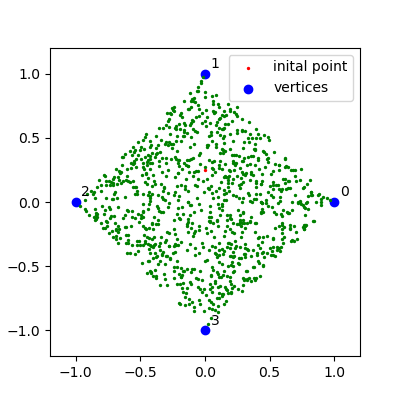

In [25]:
cg = chaos_game(4, 1000)

mv = cg.animate()
HTML(mv)

In [7]:
HTML(mv)

'''raw::
:file: sierpinski.html
'''

In [ ]:
ss = np.random.SeedSequence()
entropy = ss.entropy
print(entropy)

In [ ]:
t = np.array([[1, 2], [3, 4]])
t[0]